In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as ss
import numpy.random as nr
import datetime
from glob import glob

nr.seed(4242)

In [5]:
players = pd.read_excel('data/Woehammer-Database.xlsx.xlsm', sheet_name='Player Elo Rankings 1st Sep', skiprows=1)
players.head()

,Player,Elo,Nation,P,W,D,L,Win Rate
0,Thomas Guan,909.885421,USA,236,201,1,34,0.853814
1,Gavin Grigar,841.696259,USA,243,209,1,33,0.862140
2,Jarod Brown,761.786930,USA,78,67,1,10,0.865385
3,Jeremy Veysseire,750.821254,USA,113,100,0,13,0.884956
4,Kel Pigg,748.382847,USA,157,138,1,18,0.882166


In [9]:
print(f"Players Data Shape: {players.shape}")
players.describe()

Players Data Shape: (19828, 8)


,Elo,P,W,D,L,Win Rate
count,19828.000000,19828.000000,19828.000000,19828.000000,19828.000000,19577.000000
mean,397.332781,13.524561,6.536161,0.418751,6.569649,0.431429
std,44.239833,20.226110,12.458611,0.894667,8.800241,0.245221
min,128.655679,0.000000,0.000000,0.000000,0.000000,0.000000
25%,374.325572,3.000000,1.000000,0.000000,2.000000,0.300000
50%,390.581763,6.000000,2.000000,0.000000,3.000000,0.414141
75%,410.605918,15.000000,6.000000,1.000000,8.000000,0.611111
max,909.885421,269.000000,209.000000,12.000000,124.000000,1.000000


In [19]:
for c in players.columns:
    print(f"Null count for {c}: {players[c].isnull().sum()}")
players_clean = players.dropna(axis=0, how='any')
players_clean.head()

Null count for Player: 0
Null count for Elo: 0
Null count for Nation: 303
Null count for P: 0
Null count for W: 0
Null count for D: 0
Null count for L: 0
Null count for Win Rate: 251


,Player,Elo,Nation,P,W,D,L,Win Rate
0,Thomas Guan,909.885421,USA,236,201,1,34,0.853814
1,Gavin Grigar,841.696259,USA,243,209,1,33,0.862140
2,Jarod Brown,761.786930,USA,78,67,1,10,0.865385
3,Jeremy Veysseire,750.821254,USA,113,100,0,13,0.884956
4,Kel Pigg,748.382847,USA,157,138,1,18,0.882166


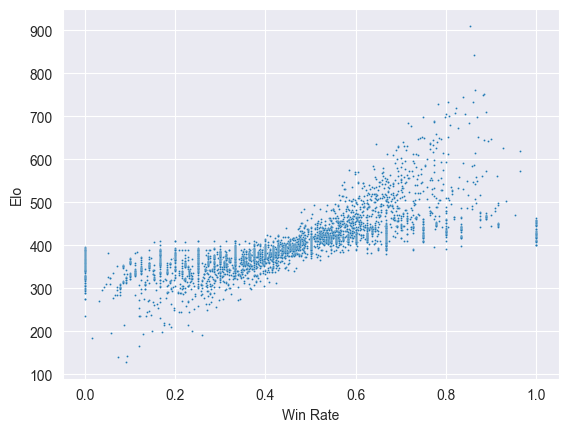

In [27]:
_ = sns.scatterplot(data=players_clean[players_clean['Nation'] == 'USA'], x='Win Rate', y='Elo', s=2)

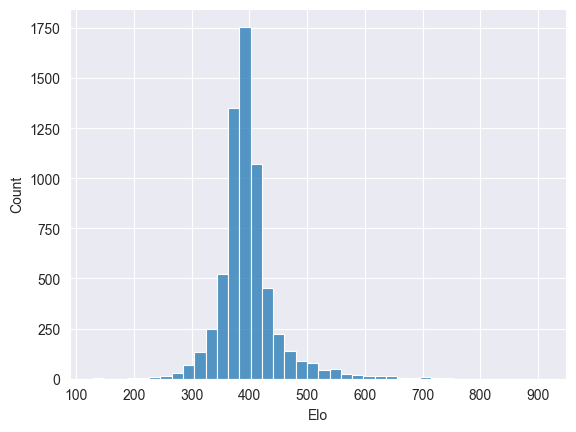

In [32]:
_ = sns.histplot(data=players_clean[players_clean.Nation == 'USA'], x = 'Elo', bins=40)

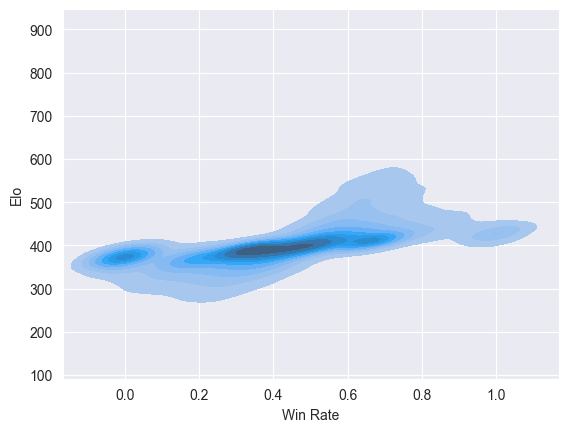

In [39]:
fig, ax = plt.subplots()
_ = sns.kdeplot(data=players_clean[players_clean.Nation == 'USA'], x='Win Rate', y = 'Elo', fill=True, ax = ax)
# plt.ylim((250,600))

In [42]:
matches = pd.read_excel('data/Woehammer-Database.xlsx.xlsm', sheet_name='Matches', skiprows=1   )
matches.head()

,Pairing_ID,Round,Player1 Name,Player2 Name,Player1 Result,Player2 Result,Player1 Score,Player2 Score,Event Name,Event Date,...,Nation Lookup,Missing Factions?,Mirror Match?,Within Last 60 Days?,Rounds,Event Type,Faction Pairings,Month,Players,Battleplan
0,1,1,Zachary Shinn,Jonathan Weretka,0.0,1.0,NaN,NaN,4th Release RTT/Party @Layton Gaming,2024-07-13 04:00:00,...,USA,Y,N,Y,3,RTT/Casual,Kruleboyz,7,10.666667,The Vice
1,2,1,Chris Folk,Jonathan Roberts,1.0,0.0,NaN,NaN,4th Release RTT/Party @Layton Gaming,2024-07-13 04:00:00,...,USA,Y,N,Y,3,RTT/Casual,Ironjawz,7,10.666667,The Vice
2,3,1,Jacob Parson,Frank Raymond,1.0,0.0,NaN,NaN,4th Release RTT/Party @Layton Gaming,2024-07-13 04:00:00,...,USA,Y,N,Y,3,RTT/Casual,Soulblight Gravelords,7,10.666667,The Vice
3,4,1,Ben Salamatian,David Heredia,1.0,0.0,NaN,NaN,4th Release RTT/Party @Layton Gaming,2024-07-13 04:00:00,...,USA,Y,N,Y,3,RTT/Casual,Nighthaunt,7,10.666667,The Vice
4,5,1,Ian Osterhout,matthew powell,0.0,1.0,NaN,NaN,4th Release RTT/Party @Layton Gaming,2024-07-13 04:00:00,...,USA,N,N,Y,3,RTT/Casual,Disciples of TzeentchCities of Sigmar,7,10.666667,The Vice


In [57]:
factions = sorted(list(matches['Player1 Faction'].dropna().unique()))
factions


['Beasts of Chaos',
 'Blades of Khorne',
 'Bonesplitterz',
 'Cities of Sigmar',
 'Daughters of Khaine',
 'Disciples of Tzeentch',
 'Flesh-eater Courts',
 'Fyreslayers',
 'Gloomspite Gitz',
 'Hedonites of Slaanesh',
 'Idoneth Deepkin',
 'Ironjawz',
 'Kharadron Overlords',
 'Kruleboyz',
 'Lumineth Realm-lords',
 'Maggotkin of Nurgle',
 'Nighthaunt',
 'Ogor Mawtribes',
 'Ossiarch Bonereapers',
 'Seraphon',
 'Skaven',
 'Slaves to Darkness',
 'Sons of Behemat',
 'Soulblight Gravelords',
 'Stormcast Eternals',
 'Sylvaneth']

In [70]:
print(f"Pre cleaned matches: {matches.shape}")
matches_clean = matches.dropna(axis=0, how='any', subset=['Player1 Faction', 'Player2 Faction']).copy()
print(f"Post cleaned matches: {matches_clean.shape}")

Pre cleaned matches: (9172, 36)
Post cleaned matches: (8503, 36)


In [79]:
def get_winner_stat(d, col):
    match d.loc['Player1 Result']:
        case 1.0:
            ans = d.loc[col]
        case 0.0:
            ans = d.loc['Player2 Faction']
        case _:
            ans = "Tie"
    return ans
    

matches_clean['Winning Faction'] = matches_clean.apply(get_winner_faction, axis=1)
matches_clean['Winning Faction'].describe()

count                   8503
unique                    27
top       Slaves to Darkness
freq                     769
Name: Winning Faction, dtype: object

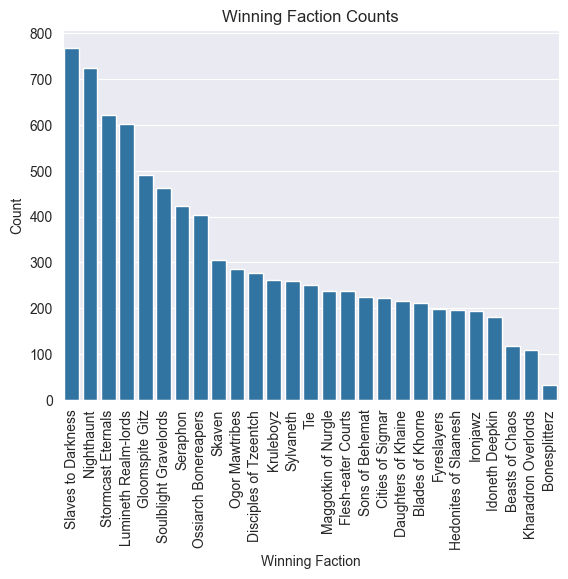

In [104]:
fig, ax = plt.subplots()
_ = sns.countplot(data=matches_clean, x='Winning Faction', order=matches_clean['Winning Faction'].value_counts().index)
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Count')
_ = plt.title('Winning Faction Counts')

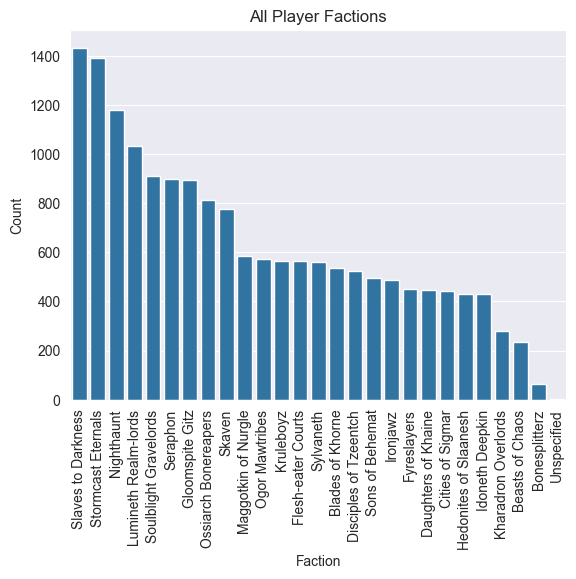

In [103]:
fig, ax = plt.subplots()
all_factions = pd.concat([matches_clean['Player1 Faction'], matches_clean['Player2 Faction']])
_ = sns.countplot(x=all_factions, order=all_factions.value_counts().index)
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Faction')
_ = plt.ylabel('Count')
_ = plt.title('All Player Factions')